In [35]:
#Load our required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, mean_squared_error

In [13]:
# #If our data is hosted on a public domain
# from zipfile import ZipFile
# import urllib.request
# from io import BytesIO
# folder = urllib.request.urlopen('File URL')
# zipfile = ZipFile(BytesIO(folder.read()))
# zipfile.namelist()
#df=pd.read_csv(zipfile.open('EPL_Soccer_MLR_LR.csv')

In [17]:
#Load data into dataframe
path= "C:/Users/caoti/github/Linear-Regression-Hub/Predict Score of Soccer Player/EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(path)
# Get basic description of the data, looking the spread of the different variables,
# along with  abrupt changes between the minimum, 25th, 50th, 75th, and max for the different variables
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [28]:
#Perform EDA
#Check for missing values and datatype. This dataset is very clean with no misisng values.
df.info()
#Check for correlation to see whether we can spot any relation between variables and response(score)
df.corr()
#Notice that Cost is 96% positively correlated to Score, which is very common in the field. More talented
#player usually has higher net worth comparing to a normal one.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


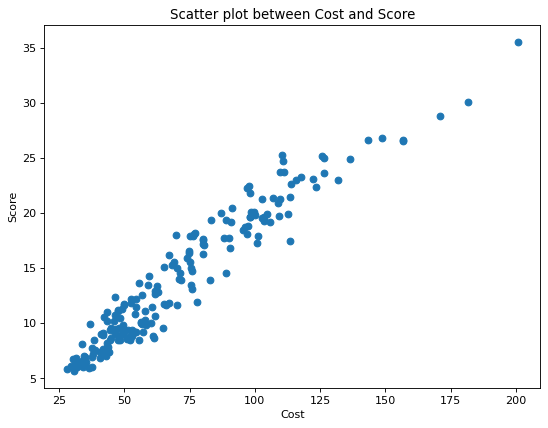

In [30]:
#Let's try to plot cost versus score to observe its correlation
x= df['Cost']
y= df['Score']

plt.figure(figsize=(8,6), dpi=80)
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

#We notice a strong correlation, but the cost above 125 may have some problems!
plt.scatter(x,y)

In [45]:
#Perform 80-20 split to get train and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=50)

In [47]:
print(f"Here is y_train size {len(y_train)} and here is x_train size {len(x_train)}")

Here is y_train size 161 and here is x_train size 161


In [50]:
#Using statmodels library  for our regression (Ordinary Least Square) since our dataset is small.
#We can also see more detail of our statistic test using statmodels
model = sm.OLS(y_train, x_train).fit()
#Printing params
model.params
model.summary()

#Force incercept term b0: yhat= b0 +b1X
x_train_intercept = sm.add_constant(x_train)
model_intercept = sm.OLS(y_train,x_train_intercept).fit()
print(model_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     2074.
Date:                Wed, 31 May 2023   Prob (F-statistic):           3.86e-93
Time:                        00:55:25   Log-Likelihood:                -312.15
No. Observations:                 161   AIC:                             628.3
Df Residuals:                     159   BIC:                             634.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9160      0.309      2.967      0.0

const    0.916037
Cost     0.181886
dtype: float64


Text(0.5, 1.0, 'OLS for Cost and Score')

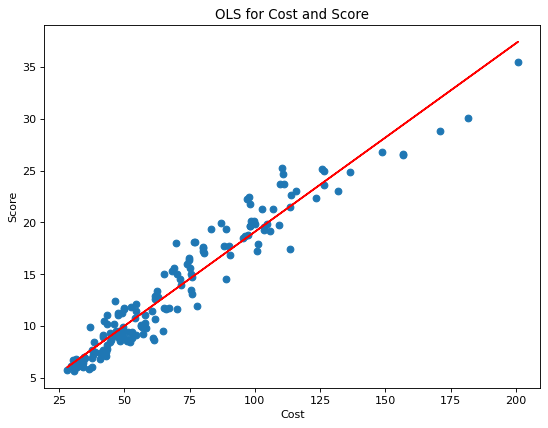

In [55]:
#Extract our b0,b1
b0=model_intercept.params[0]
b1=model_intercept.params[1]
print(model_intercept.params)

#Plotting our simple OLS model against original data
plt.figure(figsize=(8,6), dpi=80)
plt.scatter(x_train,y_train)
plt.plot(x_train,b0+b1*x_train,'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("OLS for Cost and Score")

In [67]:
#Now, check our model against test data
#Refit the model

#Extract our b0,b1
b0=model_intercept.params[0]
b1=model_intercept.params[1]
print(model_intercept.params)

#Plotting our simple OLS model against original data
plt.figure(figsize=(8,6), dpi=80)
plt.scatter(x_train,y_train)
plt.plot(x_train,b0+b1*x_train,'r')
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("OLS for Cost and Score")